# Show clustering result after feature extraction

Clustering Algorithm: KMEANS, a clustering algorithm with 1 parameters: number of clusters

### Optional: Principal component analysis (PCA)

PCA: After feature extraction, each input image is represented using 2048 dimensions. Many researchers propose the reduce the number of dimensions before clustering

## <font color=red>User Input required</font>


In [148]:
feature_path = "/work-ceph/lprasse/siegel/features/DN_fine_tune_batchsize16_epoch150"

## <font color=green>User Input optional</font>

In [ ]:
num_clust = 15
pca_num_components = 1024

## Python packages used

In [139]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pickle5 as pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
from sklearn.decomposition import PCA
import os

## Functions defined

In [140]:
def save_as_pickle(obj, filename):
    """
    save an object in a pickle file dump
    :param obj: object to dump
    :param filename: target file
    :return:
    """
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    with open(filename, 'wb') as file:
        pickle.dump(obj, file, protocol=pickle.HIGHEST_PROTOCOL)

def load_pickle(filename):
    """
    load an object from a given pickle file
    :param filename: source file
    :return: loaded object
    """
    with open(filename, 'rb') as file:
        return pickle.load(file)

## Load extracted features and filenames

In [144]:
for i in range(37):
    features = np.array(load_pickle(os.path.join(feature_path, f"train_{i}.pkl")).cpu())
    if i == 0:
        X = features
    else:
        X = np.append(X,features, axis=0)

#X = StandardScaler().fit_transform(X)
print(X.shape)

#"fine_tune_batchsize5_epoch200_Rotated" - eps = 0.027, min_samples=10

(7345, 1024)


In [145]:
filenames = load_pickle(os.path.join(feature_path, "filenames.pkl"))
print(len(filenames))

7345


## Optional: PCA

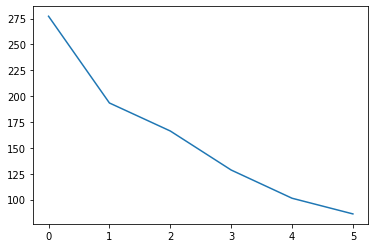

In [143]:
pca = PCA(n_components=pca_num_components) # set according to scree plot
X = pca.fit_transform(X)

# Use the indicators to select n_components
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
plt.plot(pca.singular_values_)

## Compute KMEANS clusters and print statistics

In [146]:
# Compute KMEANS
kmeans = KMeans(n_clusters=num_clust, random_state=0).fit(X)
labels = kmeans.labels_

#kmeans.cluster_centers_

In [147]:
cluster = zip(labels, filenames)

results = {}

for (label, filename) in cluster:
    if label in results:
        results[label].append(filename)
    else:
        results[label]=[filename]

for i in range(len(results)):
    print(f"Cluster {i} contains {len(results[i])} datapoints.")

# Clusters 0-x contain the found clusters
# K = 10 -> 1 interesting cluster

Cluster 0 contains 109 datapoints.
Cluster 1 contains 2046 datapoints.
Cluster 2 contains 383 datapoints.
Cluster 3 contains 142 datapoints.
Cluster 4 contains 107 datapoints.
Cluster 5 contains 2643 datapoints.
Cluster 6 contains 608 datapoints.
Cluster 7 contains 432 datapoints.
Cluster 8 contains 723 datapoints.
Cluster 9 contains 152 datapoints.


## Show several images for each cluster

### Clusters 0 - x

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.07.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1282.b.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.162.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.19..jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.267.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.364.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.370.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.371.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.373.0.01.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.373.0.02.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.443.0.13.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.445.0.00_1.jpg
/work-ceph/lprasse/siegel/

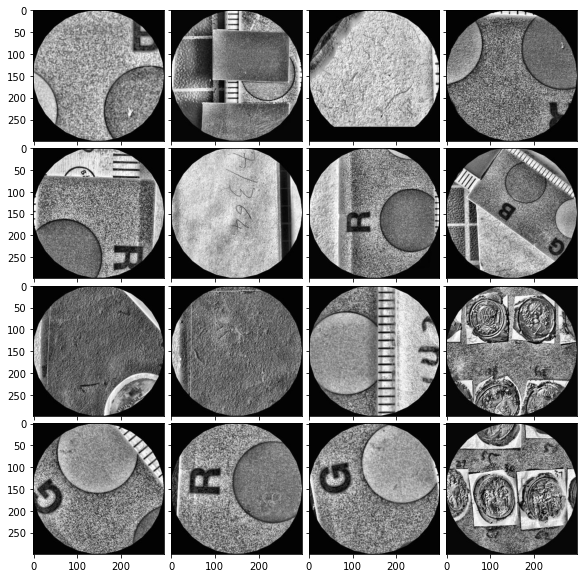

In [128]:
cluster_1 = results[0]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.15.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.100.0.4.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.107.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.108.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1086.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1088.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1089.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1090.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1092.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1098.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.110.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1100.jpg
/work-ceph/lprasse/siegel/data/siegel_gr

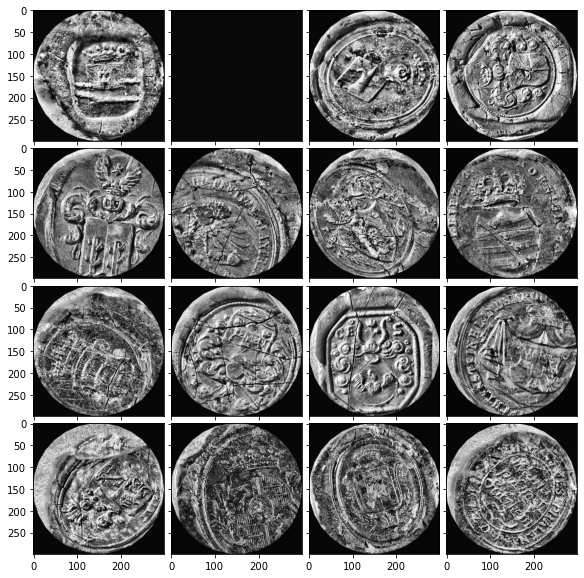

In [129]:
cluster_1 = results[1]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.21.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1087.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1132.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1143.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1186.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1187.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1228.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1232.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1233.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1237.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1239.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1258.jpg
/work-ceph/lprasse/siegel/data/siegel_gr

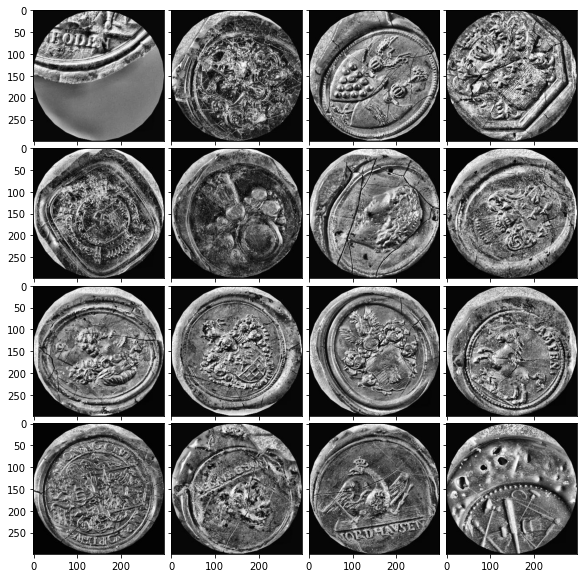

In [130]:
cluster_1 = results[2]

print_cluster1 = cluster_1[0:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.11.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.17.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1123.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1236.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1265.0.03.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1270.0.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1285.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1286.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1289.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1293.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1294.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1297.jpg
/work-ceph/lprasse/siegel/data

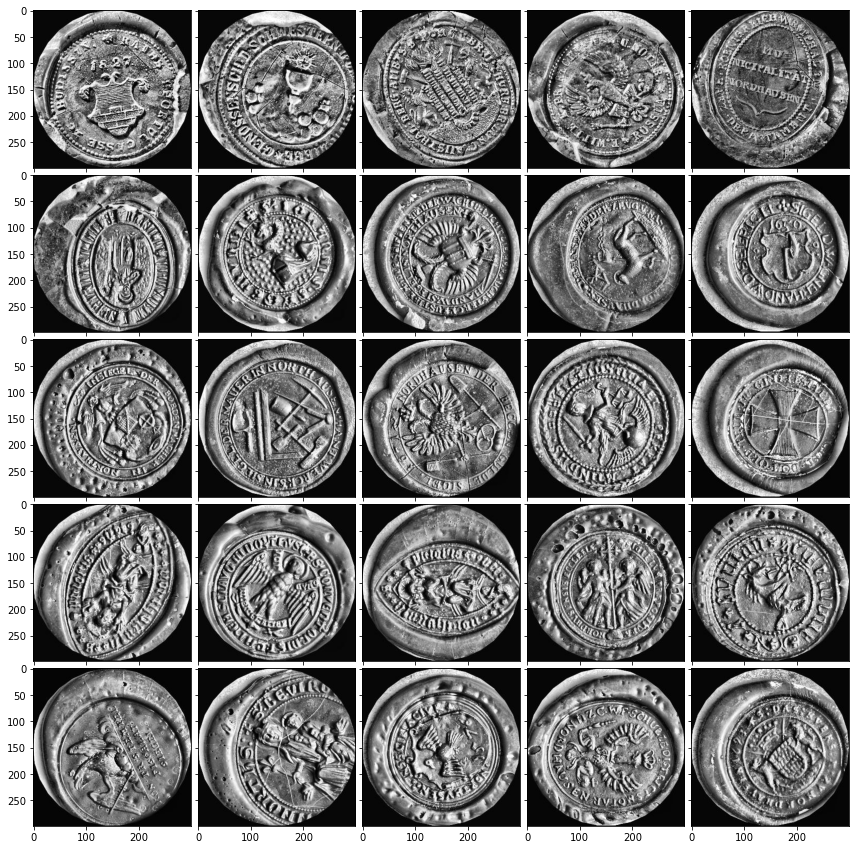

In [131]:
cluster_1 = results[3]

print_cluster1 = cluster_1[:30]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1375.03.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1375.05.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1375.17.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1375.19.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1375.21.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.449.0.23.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.455.0.12.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.456.0.18.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.458.01.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.458.03.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.464.0.26.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.464.0.29.jpg
/

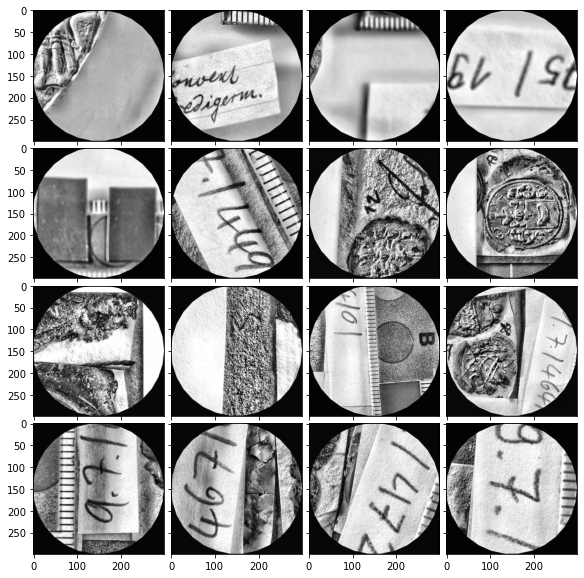

In [132]:
cluster_1 = results[4]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.01_-_Bild_2.jpeg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.03_-_Bild_2.jpeg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.08.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.10.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.13.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.14.d.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.19.a.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.22.01.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.22.02.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.22.03.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.22.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1081.jpg
/wor

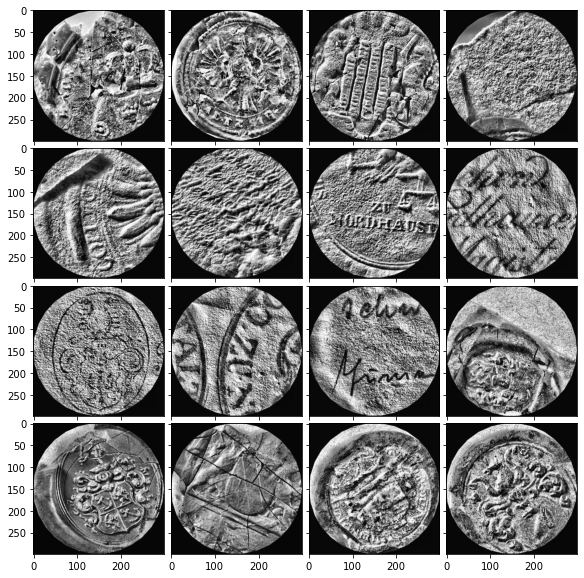

In [133]:
cluster_1 = results[5]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.02_-_Bild_2.jpeg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.09.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1085.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.109.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1119.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1138.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.120.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1207.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1208.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1227.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1244.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1270.0.03.jpg
/work-ceph/lprasse/siegel/d

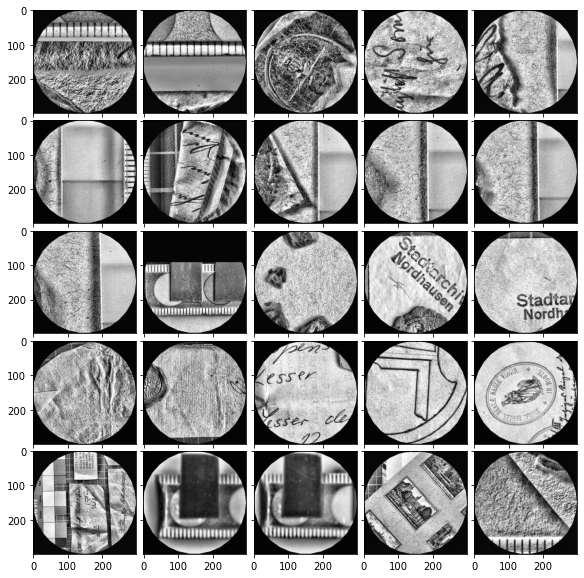

In [134]:
cluster_1 = results[6]

print_cluster1 = cluster_1[:25]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()
#167 datenpunkte

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.12.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.18.a.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.20.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.10..jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1093.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1095.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1096.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.111.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1112.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1125.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.113.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1130.jpg
/work-ceph/lprasse/siegel/data/siegel_gra

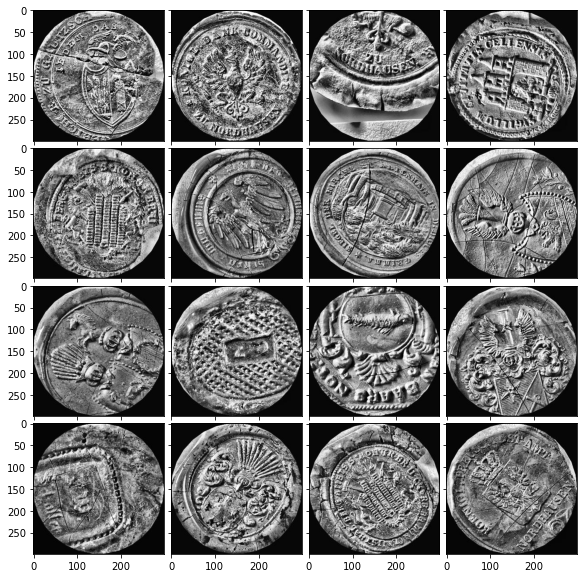

In [135]:
cluster_1 = results[7]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.06.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.16.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.100.0.3.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1080.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1094.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1099.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1101.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1111.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1134.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.114.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1145.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1150.jpg
/work-ceph/lprasse/siegel/data/siegel_

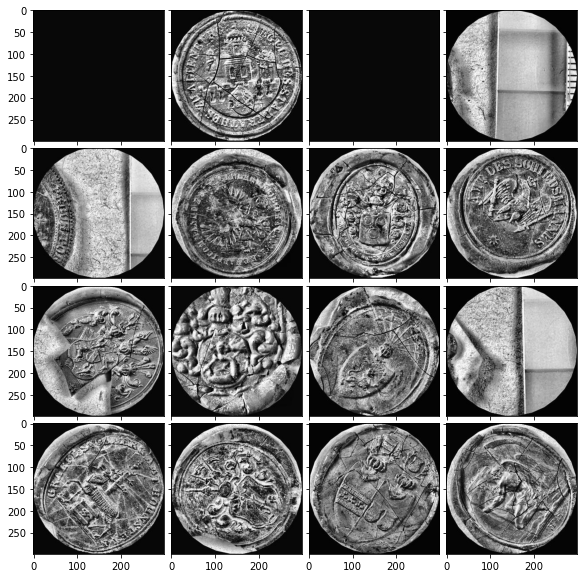

In [136]:
cluster_1 = results[8]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1110.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1263.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.127.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1354.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1374.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.138.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1392.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.145.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.252.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.269.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.270.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.272.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm

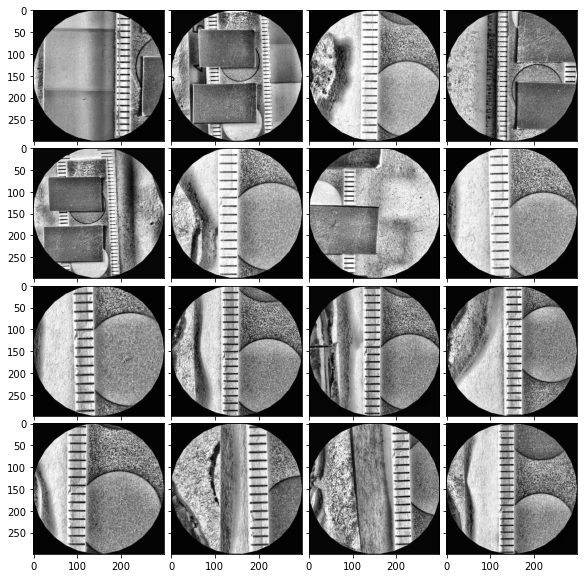

In [137]:
cluster_1 = results[9]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.02_-_Bild_2.jpeg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.09.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.12.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1083.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1084.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1108.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.111.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1113.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1114.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1116.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1117.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1124.jpg
/work-ceph/lprasse/siegel/data/

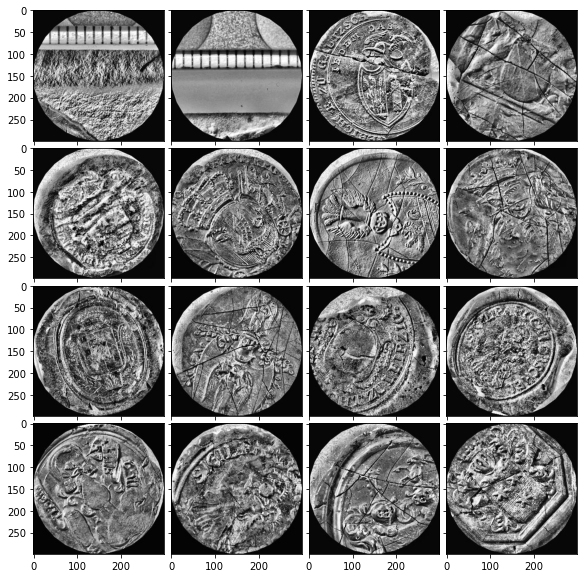

In [110]:
cluster_1 = results[10]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.22.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1093.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1098.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1102.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1103.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1104.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1105.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1118.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1121.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1126.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1128.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1130.jpg
/work-ceph/lprasse/siegel/data/siegel

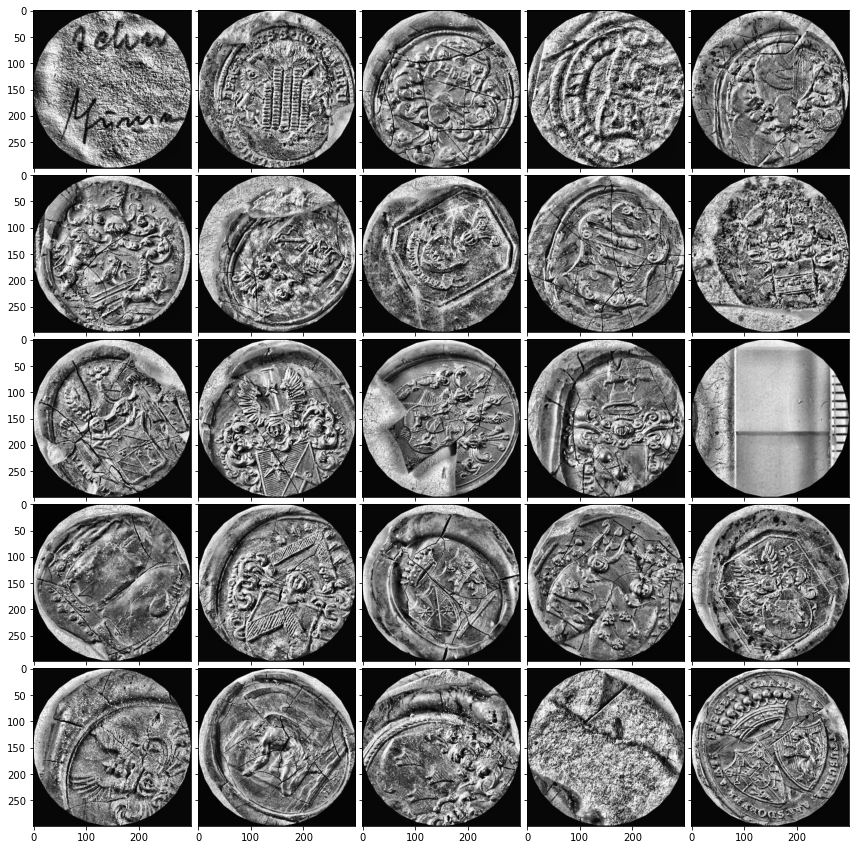

In [120]:
cluster_1 = results[11]

print_cluster1 = cluster_1[10:35]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.03_-_Bild_2.jpeg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.10.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.16.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.19.a.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.20.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.21.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.10..jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.100.0.3.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.100.0.4.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.107.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.108.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1096.jpg
/work-ceph/lprasse/siegel

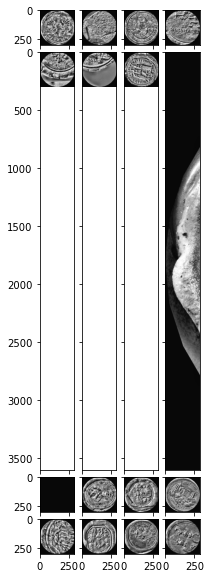

In [112]:
cluster_1 = results[12]

print_cluster1 = cluster_1[16:32]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.503.0.11.jpg


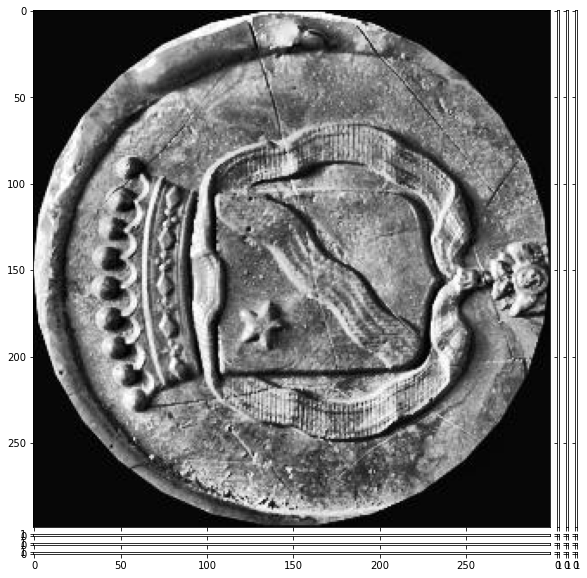

In [113]:
cluster_1 = results[13]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.01_-_Bild_2.jpeg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.07.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.08.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.09.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.13.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.14.d.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.22.02.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.22.03.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.22.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1098.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1102.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1103.jpg
/work-ceph/lprasse/

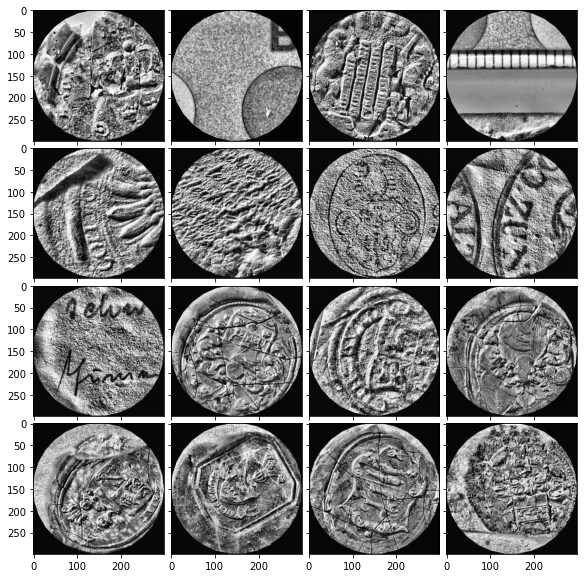

In [95]:
cluster_1 = results[14]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [96]:
cluster_1 = results[15]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

KeyError: 15

In [ ]:
cluster_1 = results[16]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[17]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()